In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Data Processing

Import the data that was written by the backend API into the text file with each line being a new entry. Process each line and save it to a list of dictionaries.

In [2]:
list_of_dicts = []

with open('raw_data.txt', "r") as f_in:
    list_of_dicts = [json.loads(line.strip().replace("\'", "\"").replace("True", "\"True\"").replace("False", "\"False\"")) for line in f_in]
#     for line in f_in:
#         # Remove newline characters and replace single quotes with double quotes
#         line = line.strip()
#         line = line.replace("\'", "\"")
#         line = line.replace("True", "\"True\"") # javascript sent the boolean values to the Python API without quotation marks
#         line = line.replace("False", "\"False\"")
#         list_of_dicts.append(line)
        
# Print one of the dictionaries in the list
print(list_of_dicts[0])

{'1': [0.01, 1, 5, 25, 50, 75, 200, 400, 500, 1000, 5000, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000], '2': [0.01, 1, 5, 50, 75, 400, 500, 5000, 10000, 50000, 100000, 200000, 300000, 500000, 750000], '3': [0.01, 1, 5, 75, 500, 10000, 50000, 100000, 200000, 300000, 500000], '4': [1, 5, 75, 10000, 100000, 200000, 300000, 500000], '5': [1, 5, 75, 10000, 300000, 500000], '6': [1, 75, 10000, 300000, 500000], 'bo1': 38973, 'po1': 4500000, 'bo2': 46063, 'po2': 4000000, 'bo3': 53588, 'po3': 500000, 'bo4': 90778, 'po4': 85565375, 'bo5': 104761, 'po5': 400000, 'bo6': 136668, 'po6': 6000, 'result': 'D', 'end_round': 6, 'winnings': 6000, 'game_id': 'G96845'}


Turn it into a dataframe to work with it more easily.

In [3]:
df = pd.DataFrame(list_of_dicts)
data = pd.json_normalize(df.to_dict(orient='records'))
data.shape

(1116, 32)

Get an idea of all the columns we have

In [4]:
data.columns

Index(['1', '2', '3', '4', '5', '6', 'bo1', 'po1', 'bo2', 'po2', 'bo3', 'po3',
       'bo4', 'po4', 'bo5', 'po5', 'bo6', 'po6', 'result', 'end_round',
       'winnings', 'game_id', '7', '8', '9', 'bo7', 'po7', 'bo8', 'po8', 'bo9',
       'po9', 'first_game'],
      dtype='object')

Delete the entries that aren't linked to Qualtrics responses

First import the data from the study, which was exported from Qualtrics

In [5]:
qualtrics = pd.read_csv('final collected data.csv')
qualtrics.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q31,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,If the chance of getting a disease is 20 out o...,"Imagine that we roll a fair, six-sided die 100...","In the BIG BUCKS LOTTERY, the chances of winni...","In the ACME PUBLISHING SWEEPSTAKES, the chance...","In a lake, there is a patch of lily pads. Ever...",If it takes five machines 5 minutes to make fi...,Suppose you have a close friend who has a lump...,Are you familiar with the game Deal or No Deal?,Enter your first game ID (G#####),Enter your second game ID (G#####)
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID34_TEXT""}","{""ImportId"":""QID33_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID31_TEXT""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID29_TEXT""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}"
2,6/16/2023 11:44,6/16/2023 11:47,IP Address,24.228.238.109,78,161,FALSE,6/23/2023 11:47,R_3su0Ltne29zNSjJ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
3,7/5/2023 13:02,7/5/2023 13:12,IP Address,47.155.28.7,81,605,FALSE,7/12/2023 13:12,R_V3adGClNwIKHEKR,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,8/24/2023 21:46,8/24/2023 21:47,IP Address,68.181.16.181,100,62,TRUE,8/24/2023 21:47,R_reia0IEJiOWKfT3,NaN,...,1000,1000,1000,1000,1000,10000,10000,No,3,3
5,8/31/2023 16:22,8/31/2023 16:27,IP Address,207.151.52.169,100,347,TRUE,8/31/2023 16:27,R_SNJOxOzIBVlJchH,NaN,...,20,500,10,0.1,47,5,50,Yes,111,2122
6,8/24/2023 21:48,8/25/2023 0:38,IP Address,68.181.16.181,4,10198,FALSE,9/1/2023 0:38,R_pN9gvr2q8XzUXap,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9/7/2023 17:34,9/7/2023 17:41,IP Address,68.181.16.80,100,407,TRUE,9/7/2023 17:41,R_1FsJAFREJ8ZcSi5,NaN,...,20,500,100,0.1,47,1,9,Yes,G61742,G37411
8,9/7/2023 17:33,9/7/2023 17:45,IP Address,207.151.52.139,100,731,TRUE,9/7/2023 17:45,R_3GkrBHRQO78S3F3,NaN,...,20,500,10,0.1,47,5,50,No,G98688,G77438
9,9/7/2023 17:46,9/7/2023 17:54,IP Address,68.181.16.140,100,464,TRUE,9/7/2023 17:54,R_296Up7NaeLaPjAb,NaN,...,20,500,10,0.1,47,5,50,Yes,G61803,G93864


Isolate the two columns that have the Game ID's that will be used to filter the data df

In [6]:
g1 = qualtrics['Q22.1']
g2 = qualtrics['Q23']

In [7]:
g1

0      Enter your first game ID (G#####)
1              {"ImportId":"QID25_TEXT"}
2                                    NaN
3                                    NaN
4                                      3
                     ...                
561                               G54674
562                               G59828
563                                  NaN
564                               G56114
565                                  NaN
Name: Q22.1, Length: 566, dtype: object

Filter out rows in data whose game ID's don't match a response from a participant in the Qualtrics survey

In [8]:
data = data[data['game_id'].isin(g1) | data['game_id'].isin(g2)]
data.shape

(804, 32)

Delete the rows from qualtrics data that aren't real game numbers

In [9]:
data['game_id']

55      G95242
58      G61742
59      G37411
60      G98688
61      G77438
         ...  
1111    G37471
1112    G59828
1113    G27316
1114    G56114
1115    G69322
Name: game_id, Length: 804, dtype: object

### Number of filtered, valid solutions

In [10]:
qualtrics = qualtrics[qualtrics['Q22.1'].isin(data['game_id'])]
qualtrics.shape

(418, 44)

In [11]:
qualtrics = qualtrics[qualtrics['Q23'].isin(data['game_id'])]
qualtrics.shape

(402, 44)

That's the number of responses where both games they listed is actually in the data.txt file

In [12]:
# qualtrics.to_csv('played.csv')

## Merge with Qualtrics Responses

In [13]:
qualtrics.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q31,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23
7,9/7/2023 17:34,9/7/2023 17:41,IP Address,68.181.16.80,100,407,TRUE,9/7/2023 17:41,R_1FsJAFREJ8ZcSi5,NaN,...,20,500,100,0.1,47,1,9,Yes,G61742,G37411
8,9/7/2023 17:33,9/7/2023 17:45,IP Address,207.151.52.139,100,731,TRUE,9/7/2023 17:45,R_3GkrBHRQO78S3F3,NaN,...,20,500,10,0.1,47,5,50,No,G98688,G77438
9,9/7/2023 17:46,9/7/2023 17:54,IP Address,68.181.16.140,100,464,TRUE,9/7/2023 17:54,R_296Up7NaeLaPjAb,NaN,...,20,500,10,0.1,47,5,50,Yes,G61803,G93864


Separate games based on whether they were played first or second. Merge accordingly

Filter second games played

In [14]:
data2 = data[data['first_game']=="False"]
data2.shape

(384, 32)

In [15]:
for colname in data2.columns:
    data2 = data2.rename(columns={colname: colname+"_g2"})
data2.head(1)

,1_g2,2_g2,3_g2,4_g2,5_g2,6_g2,bo1_g2,po1_g2,bo2_g2,po2_g2,...,7_g2,8_g2,9_g2,bo7_g2,po7_g2,bo8_g2,po8_g2,bo9_g2,po9_g2,first_game_g2
55,"[1, 5, 10, 25, 50, 75, 100, 300, 400, 500, 750...","[1, 5, 10, 25, 75, 300, 400, 500, 1000, 5000, ...","[1, 5, 25, 75, 400, 500, 1000, 25000, 50000, 1...",NaN,NaN,NaN,17259,NaN,26153.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Merge so that the G2 ID matches the ID from data2

In [16]:
df2 = pd.merge(qualtrics, data2, left_on='Q23', right_on='game_id_g2')
df2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,7_g2,8_g2,9_g2,bo7_g2,po7_g2,bo8_g2,po8_g2,bo9_g2,po9_g2,first_game_g2
0,9/7/2023 17:33,9/7/2023 17:45,IP Address,207.151.52.139,100,731,TRUE,9/7/2023 17:45,R_3GkrBHRQO78S3F3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,9/7/2023 17:46,9/7/2023 17:54,IP Address,68.181.16.140,100,464,TRUE,9/7/2023 17:54,R_296Up7NaeLaPjAb,NaN,...,"[25, 200, 750, 1000000]","[200, 750, 1000000]","[200, 750]",228968.0,500000.0,331573.0,500000.0,543.0,500.0,False
2,9/7/2023 17:43,9/7/2023 17:58,IP Address,68.181.16.66,100,893,TRUE,9/7/2023 17:58,R_3ilodc6SanicvUO,NaN,...,"[10, 300, 10000, 25000]","[300, 10000, 25000]","[10000, 25000]",8322.0,20000.0,12049.0,12000.0,19445.0,10000.0,False
3,9/7/2023 17:53,9/7/2023 18:05,IP Address,172.89.173.1,100,732,TRUE,9/7/2023 18:05,R_27VEsjDi7DG83tj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,9/7/2023 18:24,9/7/2023 18:32,IP Address,12.145.98.24,100,485,TRUE,9/7/2023 18:32,R_1K11rAviOSJl8QU,NaN,...,"[400, 75000, 750000, 1000000]","[400, 75000, 750000]","[400, 750000]",415300.0,NaN,273895.0,NaN,405595.0,NaN,False


In [17]:
df2.shape

(375, 76)

Filter 1st games played

In [18]:
data1 = data[data['first_game']=="True"]
data1.shape

(420, 32)

In [19]:
for colname in data1.columns:
    data1 = data1.rename(columns={colname: colname+"_g1"})
data1.head(1)

,1_g1,2_g1,3_g1,4_g1,5_g1,6_g1,bo1_g1,po1_g1,bo2_g1,po2_g1,...,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1
58,"[0.01, 1, 5, 10, 25, 50, 75, 100, 400, 500, 75...",NaN,NaN,NaN,NaN,NaN,30473,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [20]:
df2.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q24', 'Q1', 'Q2', 'Q3',
       'Q3_3_TEXT', 'id', 'Q4', 'Q5', 'Q10', 'Q12', 'Q11', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q32', 'Q31', 'Q30', 'Q29', 'Q28', 'Q27', 'Q26', 'Q8',
       'Q22', 'Q22.1', 'Q23', '1_g2', '2_g2', '3_g2', '4_g2', '5_g2', '6_g2',
       'bo1_g2', 'po1_g2', 'bo2_g2', 'po2_g2', 'bo3_g2', 'po3_g2', 'bo4_g2',
       'po4_g2', 'bo5_g2', 'po5_g2', 'bo6_g2', 'po6_g2', 'result_g2',
       'end_round_g2', 'winnings_g2', 'game_id_g2', '7_g2', '8_g2', '9_g2',
       'bo7_g2', 'po7_g2', 'bo8_g2', 'po8_g2', 'bo9_g2', 'po9_g2',
       'first_game_g2'],
      dtype='object')

Filter 1st game played

In [21]:
df2[['Q22.1', 'Q23']].head()

,Q22.1,Q23
0,G98688,G77438
1,G61803,G93864
2,G24923,G35139
3,G67540,G41566
4,G24239,G59548


In [22]:
data1[['game_id_g1']].head()

,game_id_g1
58,G61742
59,G37411
60,G98688
62,G61803
64,G24923


Merge so that the col from qualtrics asking for G1 ID matches ID's from data filtered for 1st game played

In [23]:
df = pd.merge(df2, data1, left_on='Q22.1', right_on='game_id_g1')
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1
0,9/7/2023 17:33,9/7/2023 17:45,IP Address,207.151.52.139,100,731,TRUE,9/7/2023 17:45,R_3GkrBHRQO78S3F3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,9/7/2023 17:46,9/7/2023 17:54,IP Address,68.181.16.140,100,464,TRUE,9/7/2023 17:54,R_296Up7NaeLaPjAb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,9/7/2023 17:43,9/7/2023 17:58,IP Address,68.181.16.66,100,893,TRUE,9/7/2023 17:58,R_3ilodc6SanicvUO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,9/7/2023 17:53,9/7/2023 18:05,IP Address,172.89.173.1,100,732,TRUE,9/7/2023 18:05,R_27VEsjDi7DG83tj,NaN,...,"[0.01, 300, 10000, 75000]","[0.01, 300, 10000]","[300, 10000]",19947.0,10000.0,3553.0,10000.0,5784.0,10000.0,True
4,9/7/2023 18:24,9/7/2023 18:32,IP Address,12.145.98.24,100,485,TRUE,9/7/2023 18:32,R_1K11rAviOSJl8QU,NaN,...,"[25, 100, 75000, 400000]","[25, 75000, 400000]","[25, 400000]",109412.0,100000.0,158414.0,100000.0,217442.0,100000.0,True


In [24]:
df.shape

(377, 108)

Fix column names to avoid confusion

In [25]:
for col in df.columns:
    print(col, end=" ")

StartDate EndDate Status IPAddress Progress Duration (in seconds) Finished RecordedDate ResponseId RecipientLastName RecipientFirstName RecipientEmail ExternalReference LocationLatitude LocationLongitude DistributionChannel UserLanguage Q24 Q1 Q2 Q3 Q3_3_TEXT id Q4 Q5 Q10 Q12 Q11 Q13 Q14 Q15 Q16 Q17 Q32 Q31 Q30 Q29 Q28 Q27 Q26 Q8 Q22 Q22.1 Q23 1_g2 2_g2 3_g2 4_g2 5_g2 6_g2 bo1_g2 po1_g2 bo2_g2 po2_g2 bo3_g2 po3_g2 bo4_g2 po4_g2 bo5_g2 po5_g2 bo6_g2 po6_g2 result_g2 end_round_g2 winnings_g2 game_id_g2 7_g2 8_g2 9_g2 bo7_g2 po7_g2 bo8_g2 po8_g2 bo9_g2 po9_g2 first_game_g2 1_g1 2_g1 3_g1 4_g1 5_g1 6_g1 bo1_g1 po1_g1 bo2_g1 po2_g1 bo3_g1 po3_g1 bo4_g1 po4_g1 bo5_g1 po5_g1 bo6_g1 po6_g1 result_g1 end_round_g1 winnings_g1 game_id_g1 7_g1 8_g1 9_g1 bo7_g1 po7_g1 bo8_g1 po8_g1 bo9_g1 po9_g1 first_game_g1 

In [26]:
df.drop(columns=['Q24', 'StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage','first_game_g1', 'first_game_g2'])

,IPAddress,Q1,Q2,Q3,Q3_3_TEXT,id,Q4,Q5,Q10,Q12,...,game_id_g1,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1
0,207.151.52.139,20,14,Female,NaN,NaN,No,NaN,3,4,...,G98688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.181.16.140,21,15,Male,NaN,NaN,No,NaN,5,5,...,G61803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68.181.16.66,20,14,Female,NaN,6413591237,Yes,No,3,2,...,G24923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,172.89.173.1,28,15,Male,NaN,NaN,Yes,No,4,4,...,G67540,"[0.01, 300, 10000, 75000]","[0.01, 300, 10000]","[300, 10000]",19947.0,10000.0,3553.0,10000.0,5784.0,10000.0
4,12.145.98.24,19,19,Male,NaN,NaN,Yes,Yes,3,3,...,G24239,"[25, 100, 75000, 400000]","[25, 75000, 400000]","[25, 400000]",109412.0,100000.0,158414.0,100000.0,217442.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,207.151.52.89,21,15,Male,NaN,NaN,Yes,Yes,3,5,...,G89220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,98.176.8.92,21,16,Female,NaN,NaN,Yes,No,1,2,...,G85450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,207.151.52.24,20,12,Male,NaN,NaN,Yes,Yes,4,5,...,G54674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,50.218.62.78,20,14,Female,NaN,NaN,No,NaN,5,5,...,G59828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate log10 of winnings

In [27]:
import math
def safe_log(x):
    if x > 0:
        return math.log10(x)
    else:
        return 0

df['winnings_g1_log10'] = df['winnings_g1'].apply(safe_log)
df['winnings_g2_log10'] = df['winnings_g2'].apply(safe_log)
data['winnings_log10'] = data['winnings'].apply(safe_log)

In [28]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1,winnings_g1_log10,winnings_g2_log10
0,9/7/2023 17:33,9/7/2023 17:45,IP Address,207.151.52.139,100,731,TRUE,9/7/2023 17:45,R_3GkrBHRQO78S3F3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.278754,4.487223
1,9/7/2023 17:46,9/7/2023 17:54,IP Address,68.181.16.140,100,464,TRUE,9/7/2023 17:54,R_296Up7NaeLaPjAb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5.018971,2.301030
2,9/7/2023 17:43,9/7/2023 17:58,IP Address,68.181.16.66,100,893,TRUE,9/7/2023 17:58,R_3ilodc6SanicvUO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,4.623714,4.000000
3,9/7/2023 17:53,9/7/2023 18:05,IP Address,172.89.173.1,100,732,TRUE,9/7/2023 18:05,R_27VEsjDi7DG83tj,NaN,...,"[300, 10000]",19947.0,10000.0,3553.0,10000.0,5784.0,10000.0,True,4.000000,4.834039
4,9/7/2023 18:24,9/7/2023 18:32,IP Address,12.145.98.24,100,485,TRUE,9/7/2023 18:32,R_1K11rAviOSJl8QU,NaN,...,"[25, 400000]",109412.0,100000.0,158414.0,100000.0,217442.0,100000.0,True,5.602060,2.602060


In [29]:
df = df.drop_duplicates(subset='game_id_g1', keep=False)
df.shape

(341, 110)

In [30]:
df = df.drop_duplicates(subset='game_id_g2', keep=False)
df.shape

(341, 110)

# Exploratory Data Analysis

## Winnings

### Combined winnings
Concatenate winnings 1 and 2 into a single df of winnings

In [31]:
comb_winnings = pd.concat([df['winnings_g1'], df['winnings_g2']])
comb_winnings_log10 = pd.concat([df['winnings_g1_log10'], df['winnings_g2_log10']])

In [32]:
w = comb_winnings.describe()
wlog = comb_winnings_log10.describe()
wdescr = pd.concat([w, wlog], axis = 1)
wdescr.columns = ['winnings', 'winnings_log10']
print(wdescr)

             winnings  winnings_log10
count      682.000000      682.000000
mean     60533.472258        3.724541
std     130571.981969        1.519421
min          0.000000       -2.000000
25%        500.000000        2.698970
50%      25000.000000        4.397940
75%      58658.250000        4.768328
max    1000000.000000        6.000000


Text(0.5, 1.0, 'log(winnings) counts')

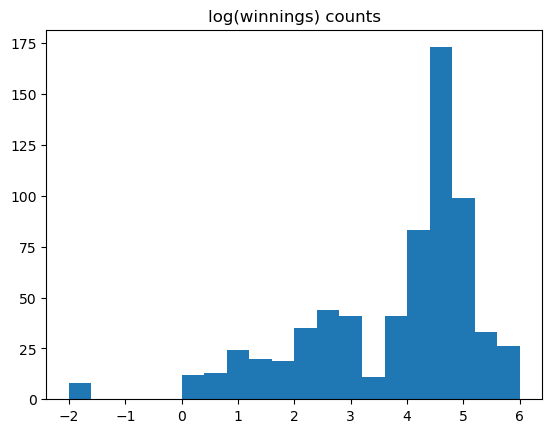

In [33]:
plt.hist(comb_winnings_log10, bins=20)
plt.title('log(winnings) counts')

### Winnings by game ordering

In [34]:
df[['winnings_g1', 'winnings_g1_log10', 'end_round_g1', 'winnings_g2', 'winnings_g2_log10', 'end_round_g2']].describe()

,winnings_g1,winnings_g1_log10,end_round_g1,winnings_g2,winnings_g2_log10,end_round_g2
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,59546.011848,3.740005,4.052786,61520.932669,3.709078,4.941349
std,139429.995537,1.484682,3.344464,121266.440724,1.555413,3.625412
min,0.000000,-2.000000,1.000000,0.000000,-2.000000,1.000000
25%,500.000000,2.698970,1.000000,750.000000,2.875061,1.000000
50%,25000.000000,4.397940,3.000000,25000.000000,4.397940,4.000000
75%,60255.000000,4.779993,6.000000,57978.000000,4.763263,10.000000
max,1000000.000000,6.000000,10.000000,750000.000000,5.875061,10.000000


### Banker's Offer Winnings

Filter for the ones in `df` that don't have po1 defined.

In [35]:
b1data = df[df['po1_g1'].isnull()] # game 1 was Banker's Offer
b2data = df[df['po1_g2'].isnull()] # game 2 was Banker's Offer
comb_bwinnings = pd.concat([b1data['winnings_g1'], b2data['winnings_g2']])
comb_bwinnings_log10 = pd.concat([b1data['winnings_g1_log10'], b2data['winnings_g2_log10']])

Combine into one describe table

In [36]:
wb = comb_bwinnings.describe()
wblog = comb_bwinnings_log10.describe()
wbdescr = pd.concat([wb, wblog], axis = 1)
wbdescr.columns = ['winnings', 'winnings_log10']
print(wbdescr)

             winnings  winnings_log10
count      341.000000      341.000000
mean     83468.492727        4.521378
std     129403.361187        0.937059
min          0.010000       -2.000000
25%      29535.000000        4.470337
50%      41752.000000        4.620677
75%      89195.000000        4.950341
max    1000000.000000        6.000000


### Player's Offer Winnings

Filter for the ones in `df` that have po1 defined.

In [37]:
p1data = df[df['po1_g1'].notnull()] # game 1 was Player's Offer
p2data = df[df['po1_g2'].notnull()] # game 2 was Player's Offer
comb_pwinnings = pd.concat([p1data['winnings_g1'], p2data['winnings_g2']])
comb_pwinnings_log10 = pd.concat([p1data['winnings_g1_log10'], p2data['winnings_g2_log10']])

Combine into one describe table

In [38]:
wp = comb_pwinnings.describe()
wplog = comb_pwinnings_log10.describe()
wpdescr = pd.concat([wp, wplog], axis = 1)
wpdescr.columns = ['winnings', 'winnings_log10']
print(wpdescr)

             winnings  winnings_log10
count      341.000000      341.000000
mean     37598.451789        2.927704
std     127858.807956        1.572374
min          0.000000       -2.000000
25%         98.000000        1.991226
50%       1000.000000        3.000000
75%      10000.000000        4.000000
max    1000000.000000        6.000000


Combine for side by side comparison

In [39]:
comb_descr = pd.concat([wb, wp, wblog, wplog], axis=1)
comb_descr.columns = ['BO version winnings', 'PO version winnings', 'BO log10', 'PO log10']
print(comb_descr)

       BO version winnings  PO version winnings    BO log10    PO log10
count           341.000000           341.000000  341.000000  341.000000
mean          83468.492727         37598.451789    4.521378    2.927704
std          129403.361187        127858.807956    0.937059    1.572374
min               0.010000             0.000000   -2.000000   -2.000000
25%           29535.000000            98.000000    4.470337    1.991226
50%           41752.000000          1000.000000    4.620677    3.000000
75%           89195.000000         10000.000000    4.950341    4.000000
max         1000000.000000       1000000.000000    6.000000    6.000000


### Player Offers

Isolate player offers from df that only has people who played PO first. Rename columns for easier merging later

In [40]:
pos1 = p1data[['po1_g1','po2_g1', 'po3_g1','po4_g1', 'po5_g1','po6_g1', 'po7_g1','po8_g1','po9_g1']]
pos1.columns = [i+1 for i in range(9)]
pos1.head()

,1,2,3,4,5,6,7,8,9
0,500000.0,10000.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
3,200000.0,25000.0,25000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
4,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
5,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Same with games where PO played second

In [41]:
pos2 = p2data[["po" + str(colname) + "_g2" for colname in pos1.columns]]
pos2.head()

,po1_g2,po2_g2,po3_g2,po4_g2,po5_g2,po6_g2,po7_g2,po8_g2,po9_g2
1,500000.0,200000.0,100000.0,100000.0,100000.0,500000.0,500000.0,500000.0,500.0
2,100000.0,200000.0,77000.0,80000.0,100000.0,200000.0,20000.0,12000.0,10000.0
6,10000.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,800000.0,600000.0,450000.0,400000.0,300000.0,275000.0,230000.0,200000.0,190000.0
12,750000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename, prepare to merge

In [42]:
pos2.columns = [i+1 for i in range(9)]
print(pos1.shape, pos2.shape)

(163, 9) (178, 9)


Concat at bottom

In [43]:
pos = pd.concat([pos1,pos2])
pos.shape

(341, 9)

Get descriptive stats about the Player's Offers at each round. Loop through rounds 1 through 9, drop NaNs, get the description table, format the numbers nicely. Concatenate all the description tables into one nice table.

In [44]:
podescr = pd.concat([pos[i].dropna().describe().apply(lambda x: format(x, '.1f')) for i in range(1,10)], axis=1)
podescr

,1,2,3,4,5,6,7,8,9
count,341.0,236.0,205.0,171.0,153.0,130.0,121.0,116.0,104.0
mean,2932874484.4,695438.1,248953.3,209609.9,288742.5,77113041.4,8448202.2,581066.5,259439.9
std,54153018602.6,6542323.1,817489.8,306264.9,1104257.5,877041290.0,90892583.5,4636199.9,1013070.8
min,0.0,1.0,4.0,300.0,2.0,10.0,200.0,10.0,2.0
25%,4000.0,30000.0,32000.0,50000.0,40000.0,40000.0,25000.0,10000.0,5000.0
50%,50000.0,100000.0,77000.0,100000.0,100000.0,90000.0,90000.0,60000.0,32500.0
75%,200000.0,262500.0,200000.0,200000.0,200000.0,200000.0,220000.0,150000.0,200000.0
max,1000000000000.0,100000000.0,9500000.0,2500000.0,10000000.0,10000000000.0,1000000000.0,50000000.0,10000000.0


Get count of how many non NaN values in each round, ie how many people reached each round

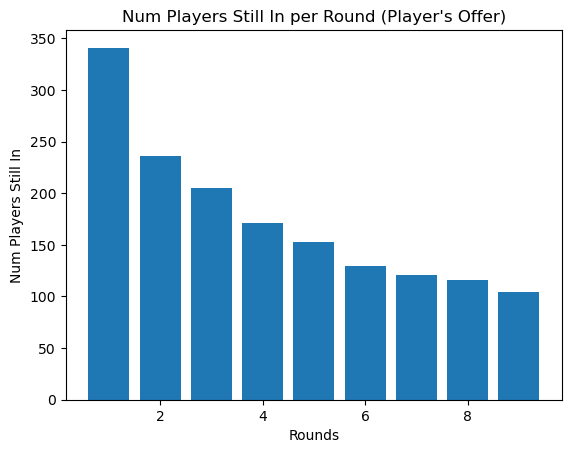

In [47]:
import numpy as np
plt.bar(np.arange(1,10), pos.count())
plt.xlabel('Rounds')
plt.ylabel('Num Players Still In')
plt.title("Num Players Still In per Round (Player's Offer)")
plt.show()

### Banker's Offers

Isolate banker offers from df that only has people who played BO first. Do the same for those who played BO second. Rename columns for easier merging

In [48]:
bos1 = b1data[["bo" + str(i) + "_g1" for i in range(1,10)]]
bos1.columns = [i+1 for i in range(9)]
bos2 = b2data[["bo" + str(i) + "_g2" for i in range(1,10)]]
bos2.columns = [i+1 for i in range(9)]

In [49]:
bos = pd.concat([bos1,bos2])
bos.head()

,1,2,3,4,5,6,7,8,9
1,39100,54654.0,104465.0,NaN,NaN,NaN,NaN,NaN,NaN
2,39261,29353.0,55876.0,42045.0,NaN,NaN,NaN,NaN,NaN
6,39152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,25276,21007.0,24073.0,9709.0,14528.0,18953.0,25734.0,3553.0,172.0
12,35372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
bodescr = pd.concat([bos[i].dropna().describe().apply(lambda x: format(x, '.1f')) for i in range(1,10)], axis=1)
bodescr

,1,2,3,4,5,6,7,8,9
count,341.0,238.0,199.0,142.0,117.0,96.0,81.0,71.0,63.0
mean,31116.4,48072.8,67755.3,85231.7,101245.2,110808.5,129451.4,139942.2,160681.6
std,6749.4,15085.9,28090.1,50651.3,75271.7,91474.1,118930.9,155849.6,205500.1
min,9136.0,10668.0,2018.0,2165.0,209.0,93.0,102.0,29.0,0.0
25%,26142.0,37695.0,47931.5,47739.0,36033.0,36119.8,29178.0,15339.0,631.0
50%,32278.0,47630.0,66400.0,81290.0,95294.0,84883.5,92461.0,67552.0,41932.0
75%,36362.0,58559.0,87638.5,123018.5,143142.0,168485.8,206084.0,249098.0,244472.0
max,40147.0,80430.0,139186.0,217513.0,289582.0,361213.0,488431.0,593125.0,938705.0


### Compare round retention

Plot the number of non NaN entries in each round for both the banker and player offers. If not NaN, an offer was made/calculated that round, which means they reached that round.

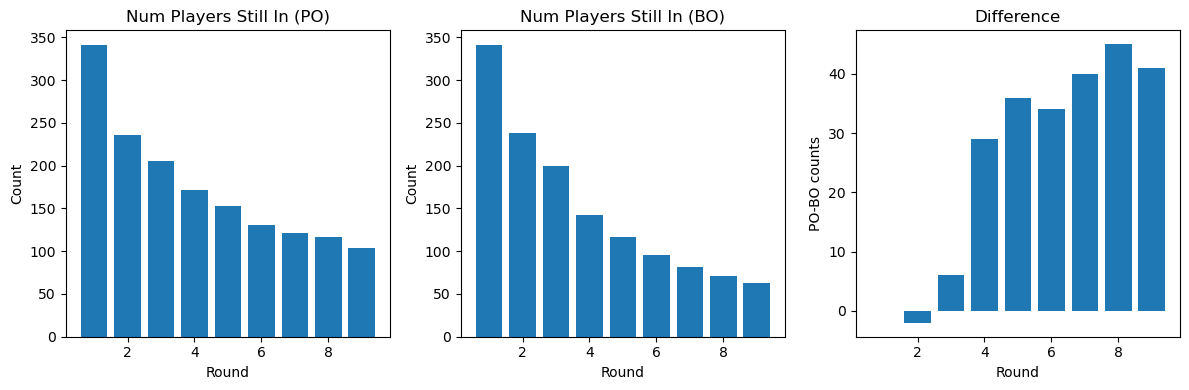

In [51]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].bar(np.arange(1,10), pos.count())
ax[0].set_title("Num Players Still In (PO)")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Count")
ax[1].bar(np.arange(1,10), bos.count())
ax[1].set_title("Num Players Still In (BO)")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Count")
ax[2].bar(np.arange(1,10), pos.count() - bos.count())
ax[2].set_title("Difference")
ax[2].set_xlabel("Round")
ax[2].set_ylabel("PO-BO counts")

plt.tight_layout()
plt.show()

### Participants

Text(0.5, 1.0, 'Gender count')

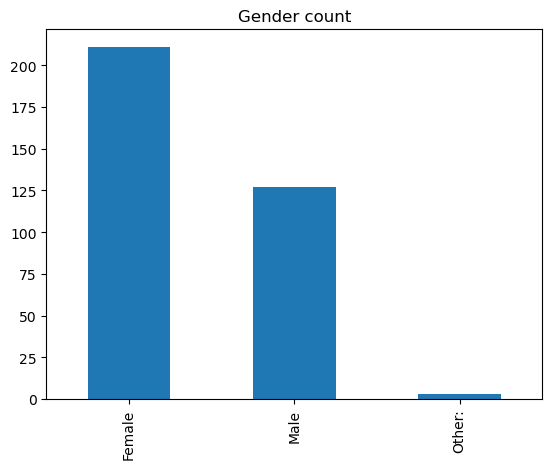

In [52]:
df['Q3'].value_counts().plot(kind='bar')
plt.title('Gender count')

Text(0.5, 1.0, 'Age')

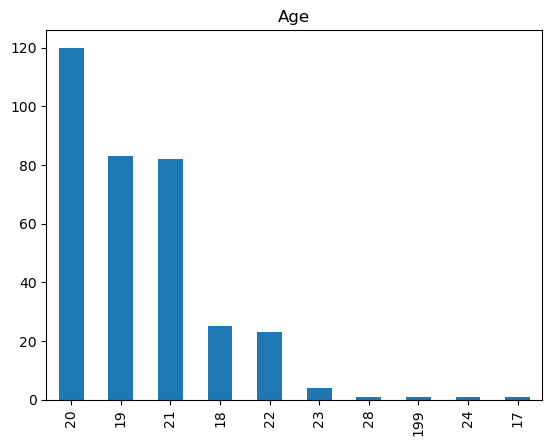

In [53]:
df['Q1'].value_counts().plot(kind='bar')
plt.title("Age")

### Round Retention

Get those who quit after the first round

In [58]:
quit = df[df['bo2_g1'].isnull() | df['bo2_g2'].isnull()]
quit[['bo1_g1', 'bo2_g1', 'bo1_g2', 'bo2_g2']].head()

,bo1_g1,bo2_g1,bo1_g2,bo2_g2
0,21354,26162.0,30706,NaN
5,26150,NaN,26728,NaN
6,39152,NaN,28366,56537.0
12,35372,NaN,27791,32131.0
13,27845,NaN,39428,NaN


Number of people who quit in either the first or second game

In [60]:
quit.shape

(149, 110)

Number of people who quit in both the first and second game

In [79]:
quitboth = df[(df['end_round_g1']==1) & (df['end_round_g2']==1)]
quitboth[['bo1_g1', 'bo2_g1', 'bo1_g2', 'bo2_g2']].head(2)

,bo1_g1,bo2_g1,bo1_g2,bo2_g2
5,26150,NaN,26728,NaN
13,27845,NaN,39428,NaN


In [80]:
quitboth.shape

(59, 110)

### Retention Matrix

Use groupby function to count the number of each combination

In [84]:
tuple_counts = df.groupby(['end_round_g1', 'end_round_g2']).size().reset_index(name='count')
tuple_counts.fillna(0)
tuple_counts

,end_round_g1,end_round_g2,count
0,1,1,59
1,1,2,13
2,1,3,13
3,1,4,5
4,1,5,5
...,...,...,...
67,10,6,3
68,10,7,3
69,10,8,3
70,10,9,3


Plot it using sns

In [86]:
heatmap_data = tuple_counts.pivot(index='end_round_g1', columns='end_round_g2', values='count')
heatmap_data.fillna(0)
heatmap_data

end_round_g2,1,2,3,4,5,6,7,8,9,10
end_round_g1,,,,,,,,,,
1,59.0,13.0,13.0,5.0,5.0,1.0,NaN,NaN,4.0,13.0
2,14.0,5.0,4.0,5.0,2.0,1.0,NaN,1.0,NaN,10.0
3,8.0,3.0,10.0,6.0,3.0,1.0,1.0,4.0,2.0,14.0
4,5.0,1.0,1.0,NaN,2.0,NaN,1.0,1.0,1.0,6.0
5,NaN,2.0,5.0,2.0,NaN,NaN,2.0,NaN,1.0,9.0
6,2.0,1.0,NaN,NaN,3.0,1.0,1.0,NaN,NaN,5.0
7,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
8,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,1.0,4.0
9,2.0,1.0,NaN,1.0,1.0,2.0,2.0,1.0,NaN,3.0
